In [35]:
import pandas as pd
from collections import Counter
import plotly.graph_objects as go

In [9]:
c_path = pd.read_csv('course_pathways.csv')
c_cat = pd.read_csv('course_catalog_by_major.csv')

# c_path.head(2)
# print(c_cat.head(2))

In [20]:
filtered_path = c_path[(c_path['Program'] == 'CECS') & ((c_path['Major'] == 'Cybersecurity') | (c_path['Major'] == 'Artificial intelligence') | (c_path['Major'] == 'Data science'))] 

In [31]:
def required(req):
    normal_path = req['Major']
    complete_path = req['CoursePath'].split(' -> ')
    req_path = c_cat[(c_cat['Major'] == normal_path) & (c_cat['Type'] == 'Required')]["Course"].tolist()
    return [stop for stop in complete_path if stop in req_path]

In [33]:
filtered_path['Journey'] = filtered_path.apply(required, axis = 1)

filtered_path_full = filtered_path[filtered_path['Journey'].map(len) > 1]

C:\Users\Weis\AppData\Local\Temp\ipykernel_18136\4002423416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_path['Journey'] = filtered_path.apply(required, axis = 1)


In [36]:
journey_counter = Counter()
for trip in filtered_path_full['Journey']:
    for i in range(len(trip) - 1):
        j = (trip[i], trip[i + 1])
        journey_counter[j] += 1

In [37]:
path_map = pd.DataFrame([{'source': a, 'target': b, 'value': count} for (a,b), count in journey_counter.items()])

In [38]:
path_map = path_map[path_map['value'] > 1]

In [39]:
stops = list(set(path_map['source']).union(set(path_map["target"])))

stops_id = {stop: i for i, stop in enumerate(stops)}

In [40]:
path_map['source_idx'] = path_map['source'].map(stops_id)

path_map['target_idx'] = path_map['target'].map(stops_id)

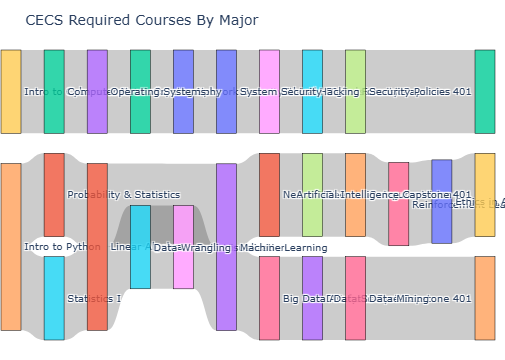

In [54]:
fig = go.Figure(data = [go.Sankey(
    arrangement= 'snap',
    node = dict(
        pad = 20,
        thickness = 20,
        line = dict(color = 'black',
                    width = 0.5),
        label = stops
    ),
    link = dict(
        source= path_map['source_idx'],
        target = path_map['target_idx'],
        value = path_map['value']
    )
)])

fig.update_layout(
    title_text = 'CECS Required Courses By Major',
    font_size = 10,
    margin = dict(l=1, r=10, t=50, b=20)
)
fig.show()